In [1]:
import jax, numpyro
import numpy as np
import jax.numpy as jnp
import numpyro.distributions as dist
import matplotlib.pyplot as plt

from jax import random
from numpyro.contrib.nested_sampling import NestedSampler

numpyro.enable_x64()

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [154]:
def model(x, y=None):
    beta = numpyro.sample("beta", dist.Normal(jnp.zeros(2), 10.0))
    sigma = numpyro.sample("sigma", dist.HalfNormal(10.0*jnp.ones(2)))
    
    frac = numpyro.sample("frac", dist.Uniform())                       
    
    logL = dist.Normal(
        jnp.array([jnp.full_like(x, beta[0]), beta[1] * x]),
        sigma[..., None]
    ).log_prob(y)
    logp = jnp.log(jnp.array([frac, 1 - frac]))[..., None] + logL
    
    logp_marg = jnp.logaddexp(logp[0], logp[1])
    numpyro.factor('obs', logp_marg)
    numpyro.deterministic("logK", (logL[1].sum() - logL[0].sum()))

In [155]:
rng = random.PRNGKey(0)

In [167]:
rng, key = random.split(rng, 2)

n = 101
x = jnp.linspace(-1, 1, n)
y = 1.0 * x + random.normal(key, shape=x.shape)
# y = random.normal(key, shape=x.shape)

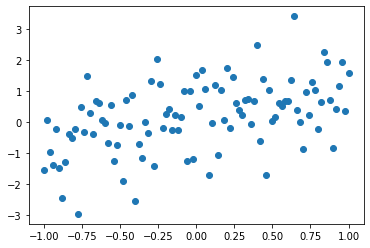

In [168]:
_, ax = plt.subplots()

ax.plot(x, y, 'o')

In [169]:
ns = NestedSampler(model)

In [170]:
rng, key = random.split(rng)
ns.run(key, x, y=y)

In [171]:
rng, key = random.split(rng)

samples = ns.get_samples(key, 1000)

(array([  3.,  13.,  37.,  95., 194., 446., 125.,  63.,  21.,   3.]),
 array([-26.07725548, -20.81738885, -15.55752221, -10.29765558,
         -5.03778895,   0.22207769,   5.48194432,  10.74181095,
         16.00167759,  21.26154422,  26.52141085]),
 <BarContainer object of 10 artists>)

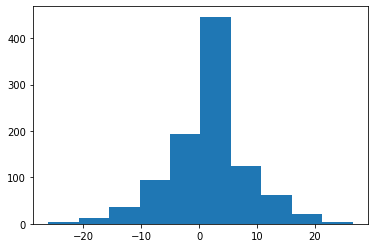

In [172]:
_, ax = plt.subplots()

beta = np.array(samples["beta"])
ax.hist(beta[:, 0])

(array([  8., 115., 295., 367., 151.,  41.,  15.,   4.,   0.,   4.]),
 array([0.34704953, 0.53112776, 0.715206  , 0.89928423, 1.08336247,
        1.26744071, 1.45151894, 1.63559718, 1.81967541, 2.00375365,
        2.18783189]),
 <BarContainer object of 10 artists>)

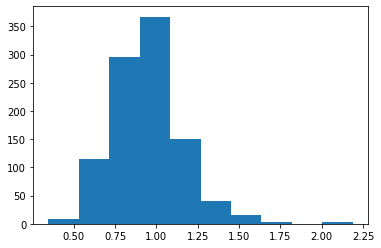

In [173]:
_, ax = plt.subplots()

beta = np.array(samples["beta"])
ax.hist(beta[:, 1])

(array([503., 175., 130.,  59.,  46.,  43.,  20.,  19.,   4.,   1.]),
 array([1.11139615e-02, 2.93771062e+00, 5.86430728e+00, 8.79090393e+00,
        1.17175006e+01, 1.46440972e+01, 1.75706939e+01, 2.04972906e+01,
        2.34238872e+01, 2.63504839e+01, 2.92770805e+01]),
 <BarContainer object of 10 artists>)

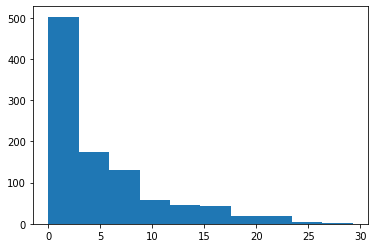

In [174]:
_, ax = plt.subplots()

sig = np.array(samples["sigma"])
ax.hist(sig[:, 0])

(array([ 21., 230., 507., 212.,  26.,   3.,   0.,   0.,   0.,   1.]),
 array([0.75475027, 0.8640829 , 0.97341553, 1.08274817, 1.1920808 ,
        1.30141343, 1.41074606, 1.5200787 , 1.62941133, 1.73874396,
        1.8480766 ]),
 <BarContainer object of 10 artists>)

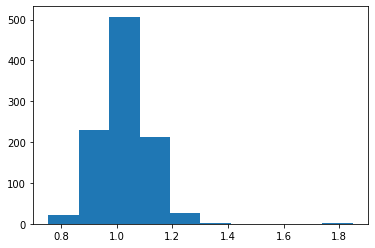

In [175]:
_, ax = plt.subplots()

sig = np.array(samples["sigma"])
ax.hist(sig[:, 1])

In [176]:
samples["logK"].mean()

DeviceArray(312415.95519811, dtype=float64)

(array([997.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.]),
 array([-1.27989050e+01,  1.24997288e+07,  2.49994704e+07,  3.74992121e+07,
         4.99989537e+07,  6.24986953e+07,  7.49984369e+07,  8.74981785e+07,
         9.99979202e+07,  1.12497662e+08,  1.24997403e+08]),
 <BarContainer object of 10 artists>)

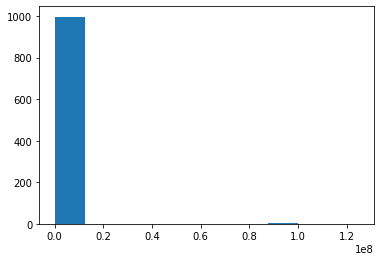

In [177]:
_, ax = plt.subplots()

logK = np.array(samples["logK"])
ax.hist(logK)